## step4: 구매할사람/안구매할사람 특성 비교 + 각 임산물 종류별 활성화 방안 인사이트 추출

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/[공모전] 임업통계 경진대회/codes/data/result_step3.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   테이블순번       9333 non-null   int64 
 1   관심인구ID      9333 non-null   object
 2   임산물명        9333 non-null   object
 3   임산물구분명      9333 non-null   object
 4   정보획득일자      9333 non-null   int64 
 5   이용자성별코드     9333 non-null   object
 6   연령그룹코드      9333 non-null   int64 
 7   이용자직업명      9333 non-null   object
 8   가구소득그룹명     9333 non-null   object
 9   결혼여부명       9333 non-null   object
 10  자녀여부명       9333 non-null   object
 11  주거형태명       9333 non-null   object
 12  이용자지역시도명    9333 non-null   object
 13  이용자지역구명     9333 non-null   object
 14  이용자지역동명     9333 non-null   object
 15  자동차그룹명      9333 non-null   object
 16  휴대전화제조사명    7720 non-null   object
 17  휴대전화가입회사명   7725 non-null   object
 18  정보획득사이트URL  9333 non-null   object
 19  정보획득사이트제목명  9333 non-null   object
 20  임산물분류   

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
categories = data['임산물분류'].unique()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   테이블순번       9333 non-null   int64 
 1   관심인구ID      9333 non-null   object
 2   임산물명        9333 non-null   object
 3   임산물구분명      9333 non-null   object
 4   정보획득일자      9333 non-null   int64 
 5   이용자성별코드     9333 non-null   object
 6   연령그룹코드      9333 non-null   int64 
 7   이용자직업명      9333 non-null   object
 8   가구소득그룹명     9333 non-null   object
 9   결혼여부명       9333 non-null   object
 10  자녀여부명       9333 non-null   object
 11  주거형태명       9333 non-null   object
 12  이용자지역시도명    9333 non-null   object
 13  이용자지역구명     9333 non-null   object
 14  이용자지역동명     9333 non-null   object
 15  자동차그룹명      9333 non-null   object
 16  휴대전화제조사명    7720 non-null   object
 17  휴대전화가입회사명   7725 non-null   object
 18  정보획득사이트URL  9333 non-null   object
 19  정보획득사이트제목명  9333 non-null   object
 20  임산물분류   

### 구매할 사람과 구매하지 않을 사람의 특성 파악


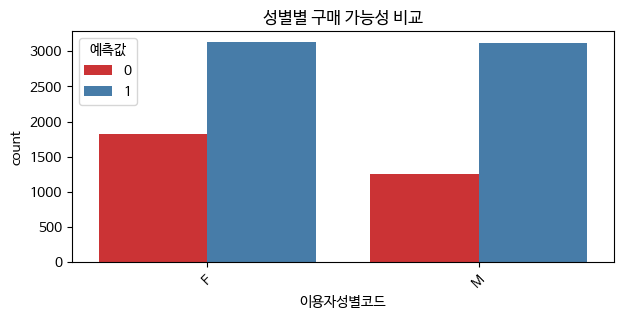

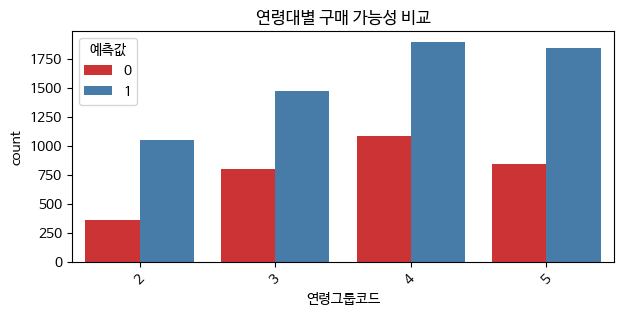

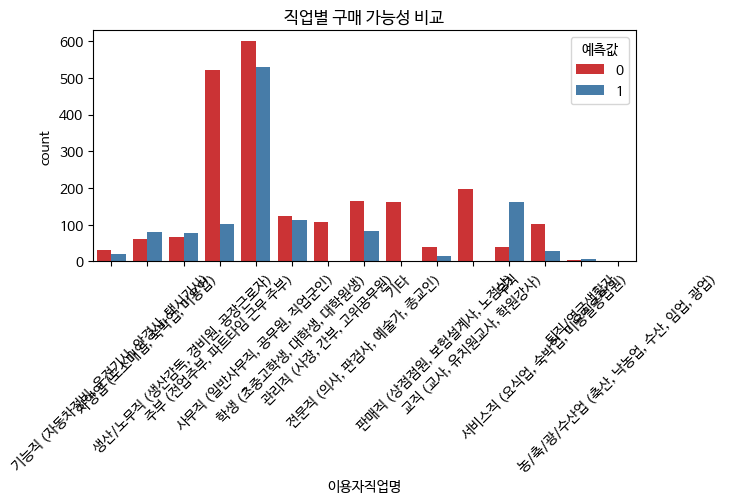

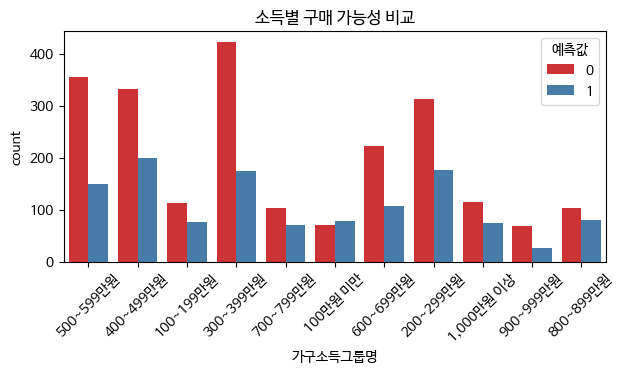

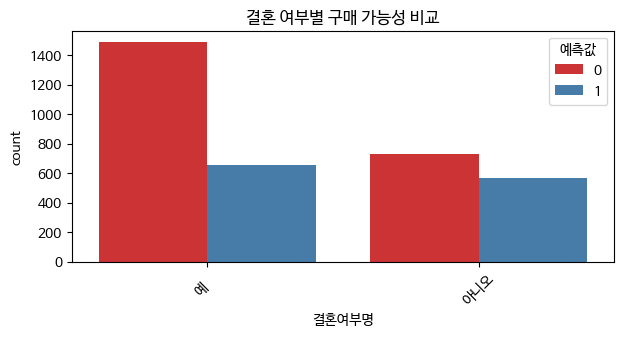

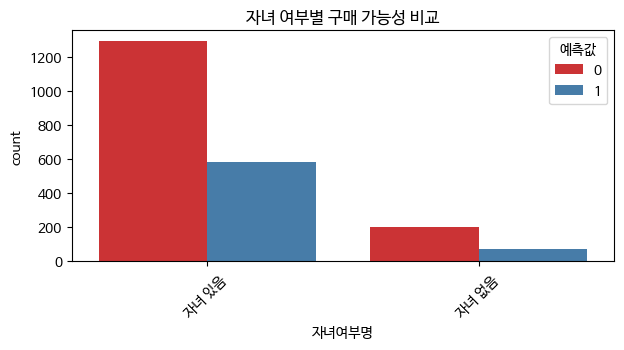

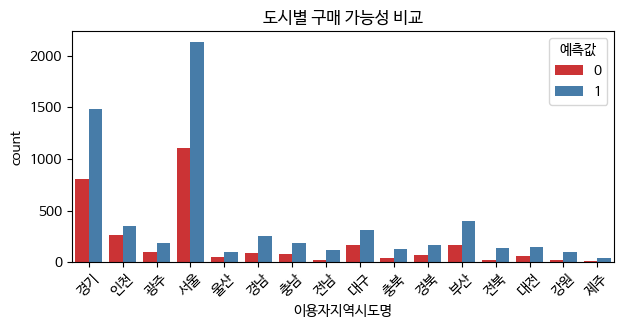

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값 0과 1로 그룹화
group_0 = data[data['예측값'] == 0]
group_1 = data[data['예측값'] == 1]

# 시각화를 위한 함수 정의
def plot_feature_comparison(feature, title):
    plt.figure(figsize=(7,3))
    sns.countplot(data=data[data[feature]!='false'], x=feature, hue='예측값', palette="Set1")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# 1. 성별 비교
plot_feature_comparison('이용자성별코드', '성별별 구매 가능성 비교')

# 2. 연령대 비교
plot_feature_comparison('연령그룹코드', '연령대별 구매 가능성 비교')

# 3. 직업군 비교
plot_feature_comparison('이용자직업명', '직업별 구매 가능성 비교')

# 4. 소득 구간 비교
plot_feature_comparison('가구소득그룹명', '소득별 구매 가능성 비교')

# 5. 결혼 여부 비교
plot_feature_comparison('결혼여부명', '결혼 여부별 구매 가능성 비교')

# 6. 자녀 여부 비교
plot_feature_comparison('자녀여부명', '자녀 여부별 구매 가능성 비교')

# 7. 이용자지역시도명
plot_feature_comparison('이용자지역시도명', '도시별 구매 가능성 비교')


### 활성화 방안 인사이트

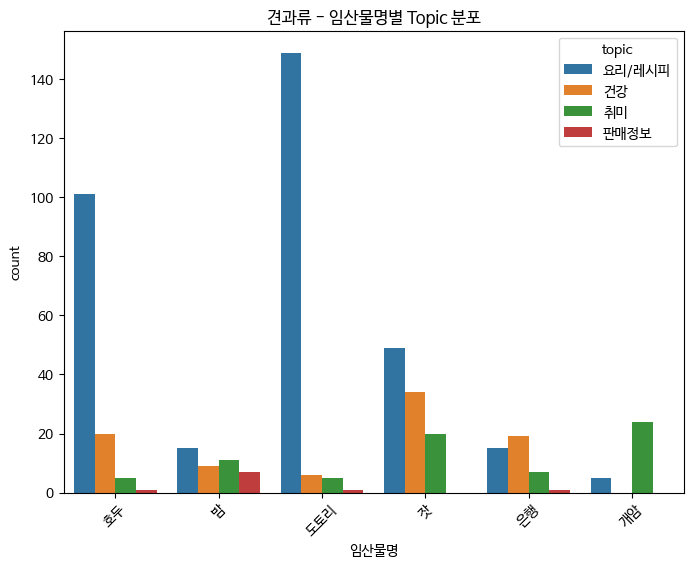

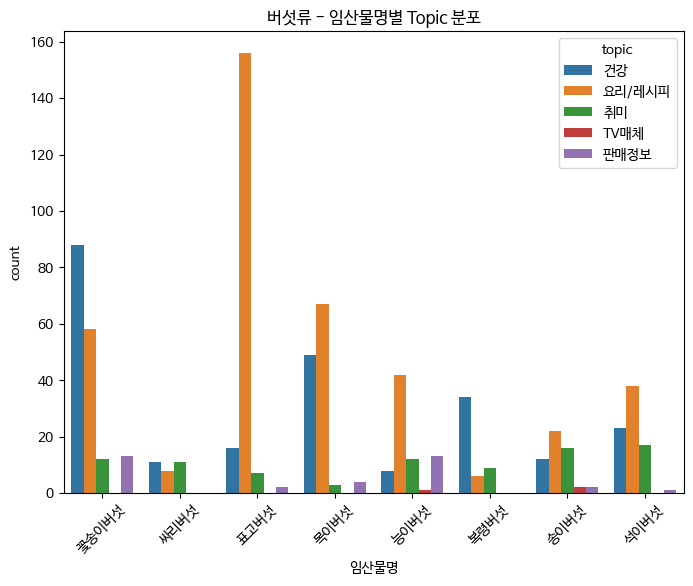

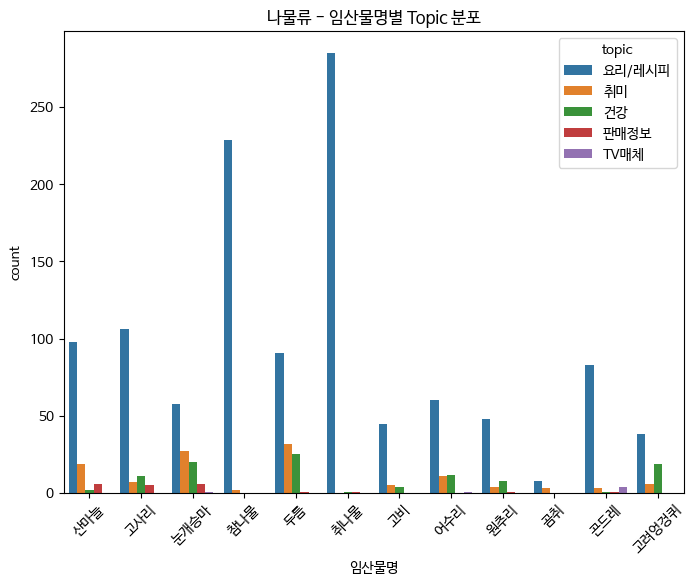

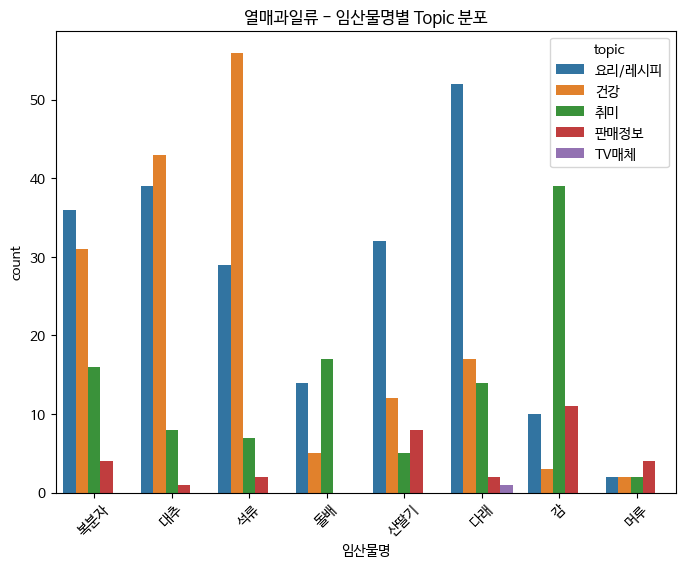

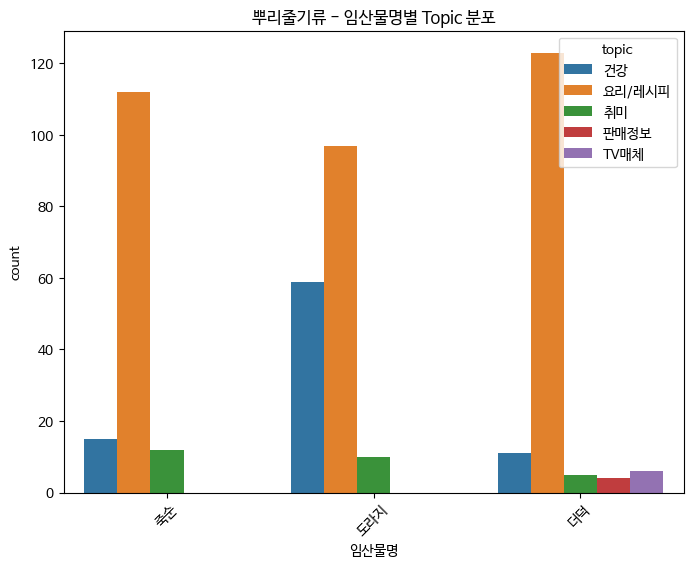

In [ ]:
for category in categories:
    plt.figure(figsize=(8, 6))
    subset = data[(data['임산물분류'] == category)& (data['예측값']==1)& (data['topic']!='알 수 없음')]
    sns.countplot(data=subset, x='임산물명', hue='topic')
    plt.title(f"{category} - 임산물명별 Topic 분포")
    plt.xticks(rotation=45)
    plt.show()

# 각 임산물별 어떻게 활성화해야 하는지에 대한 참고용
# 다음 그래프보다 조금 세부적

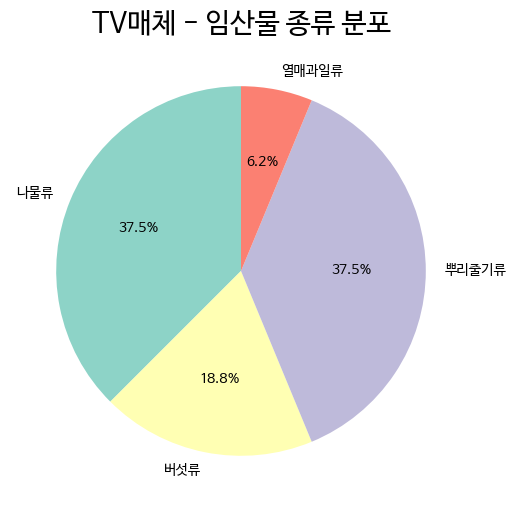

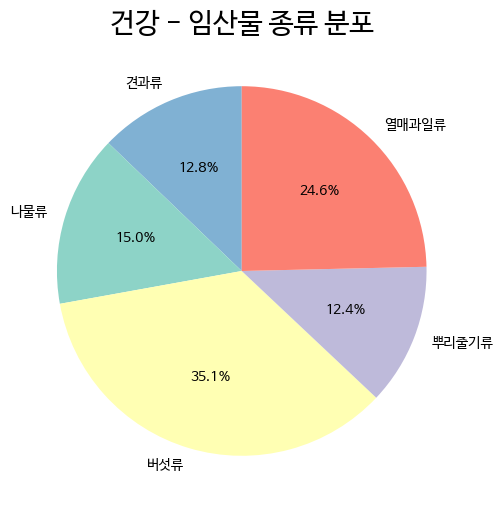

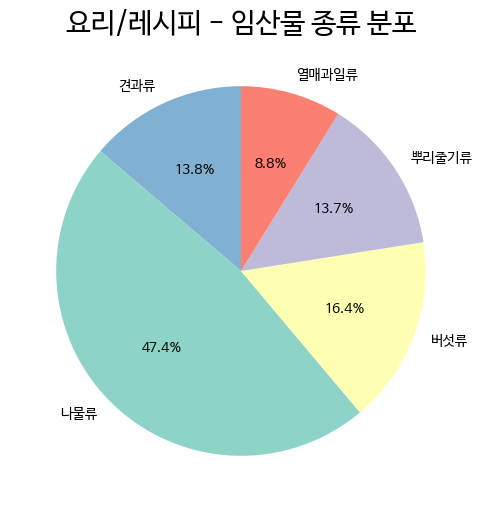

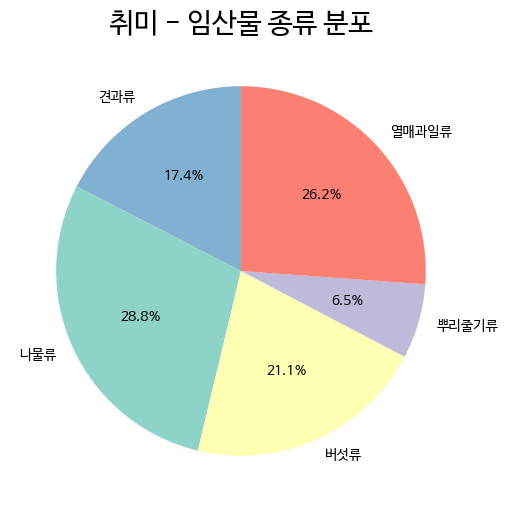

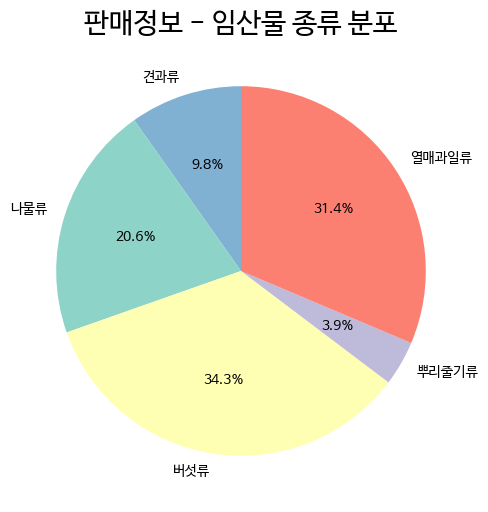

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 조건에 맞는 데이터 필터링
subset = data[(data['예측값'] == 1) & (data['topic'] != '알 수 없음')]

# 각 topic에 대해 임산물분류별로 데이터를 집계
topic_counts = subset.groupby(['topic', '임산물분류']).size().reset_index(name='count')

# 임산물분류별로 색상을 고정하기 위한 색상 정의
product_categories = topic_counts['임산물분류'].unique()
fixed_colors = sns.color_palette("Set3", len(product_categories))  # Set3 팔레트로 고정된 색상 생성

# 임산물분류별 색상 매핑
category_color_map = {category: fixed_colors[i] for i, category in enumerate(product_categories)}

# topic별 원그래프 그리기
for topic in topic_counts['topic'].unique():
    # 그래프 크기를 적당히 설정 (6x6 정도)
    plt.figure(figsize=(6, 6))

    # 각 topic에 대해 해당하는 데이터 필터링
    topic_data = topic_counts[topic_counts['topic'] == topic]

    # 각 임산물분류별로 색상 매핑
    topic_data['색상'] = topic_data['임산물분류'].map(category_color_map)

    # 원그래프 그리기, 색상은 고정된 category_color_map 사용
    plt.pie(topic_data['count'], labels=topic_data['임산물분류'], autopct='%1.1f%%', startangle=90, colors=topic_data['색상'])

    # 제목의 글자 크기 키우기
    plt.title(f"{topic} - 임산물 종류 분포", fontsize=20)

    # 레이블의 글자


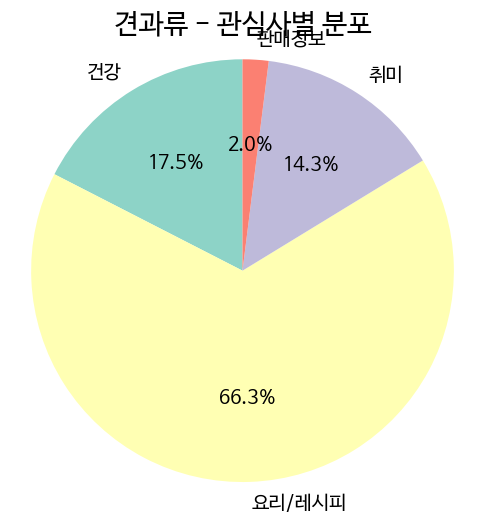

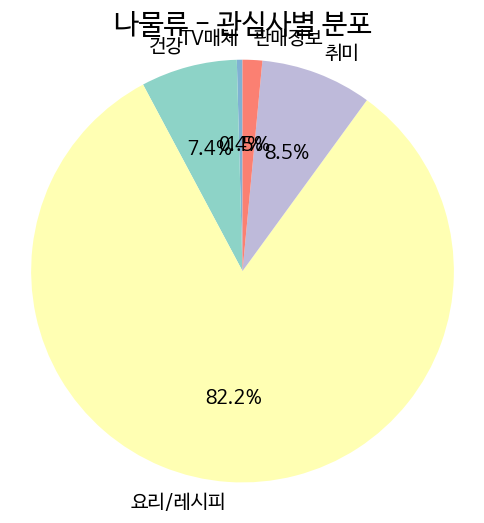

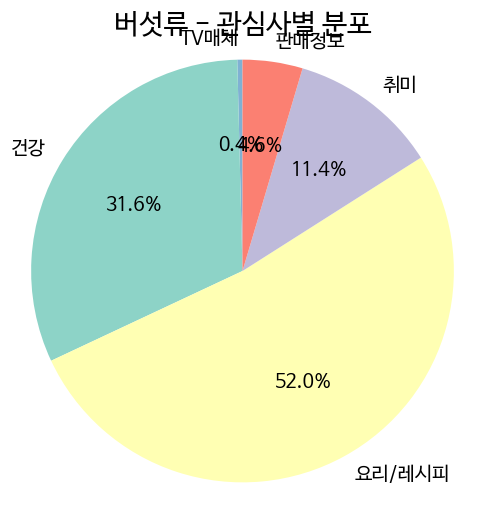

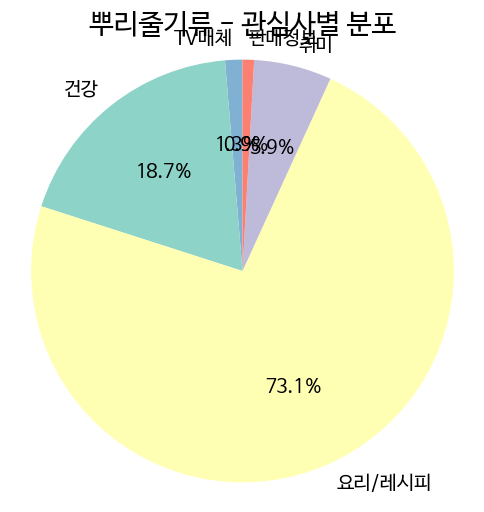

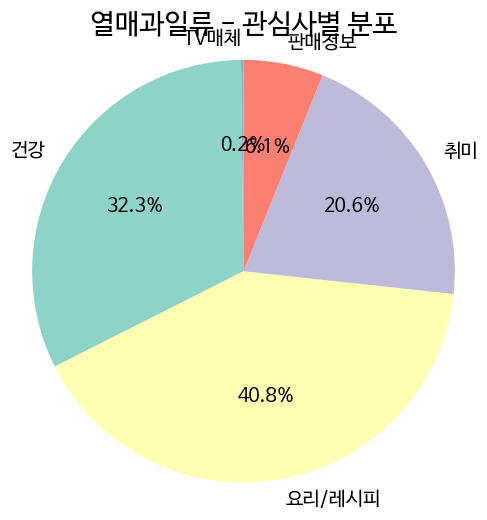

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 조건에 맞는 데이터 필터링
subset = data[(data['예측값'] == 1) & (data['topic'] != '알 수 없음')]

# 각 임산물분류에 대해 topic별로 데이터를 집계
product_topic_counts = subset.groupby(['임산물분류', 'topic']).size().reset_index(name='count')

# 임산물분류별로 색상을 고정하기 위한 색상 정의
product_categories = product_topic_counts['topic'].unique()
fixed_colors = sns.color_palette("Set3", len(product_categories))  # Set3 팔레트로 고정된 색상 생성

# 임산물분류별 색상 매핑
category_color_map = {category: fixed_colors[i] for i, category in enumerate(product_categories)}

# 임산물 종류별로 원그래프 그리기
for product in product_topic_counts['임산물분류'].unique():
    # 그래프 크기를 적당히 설정 (6x6 정도)
    plt.figure(figsize=(6, 6))

    # 각 임산물분류에 대해 해당하는 데이터 필터링
    product_data = product_topic_counts[product_topic_counts['임산물분류'] == product]

    # topic별 색상 매핑, nan을 처리하기 위해 na_action='ignore' 사용
    product_data['색상'] = product_data['topic'].map(category_color_map, na_action='ignore')

    # nan 값이 여전히 존재하면 기본 색상을 채움
    product_data['색상'].fillna('#CCCCCC', inplace=True)  # 기본 회색으로 채움

    # 원그래프 그리기, 색상은 고정된 category_color_map 사용
    plt.pie(product_data['count'], labels=product_data['topic'], autopct='%1.1f%%', startangle=90, colors=product_data['색상'])

    # 제목의 글자 크기 키우기
    plt.title(f"{product} - 관심사별 분포", fontsize=20)

    # 레이블의 글자 크기 키우기
    plt.xticks(fontsize=14)  # X축 글자 크기
    plt.yticks(fontsize=14)  # Y축 글자 크기

    # 퍼센트 값 글자 크기 키우기
    for text in plt.gca().texts:
        text.set_fontsize(14)  # 퍼센트 텍스트 크기

    # 그래프 제목과 텍스트를 강조하려면 아래와 같이 설정
    plt.axis('equal')  # 원을 동그랗게 유지
    plt.show()


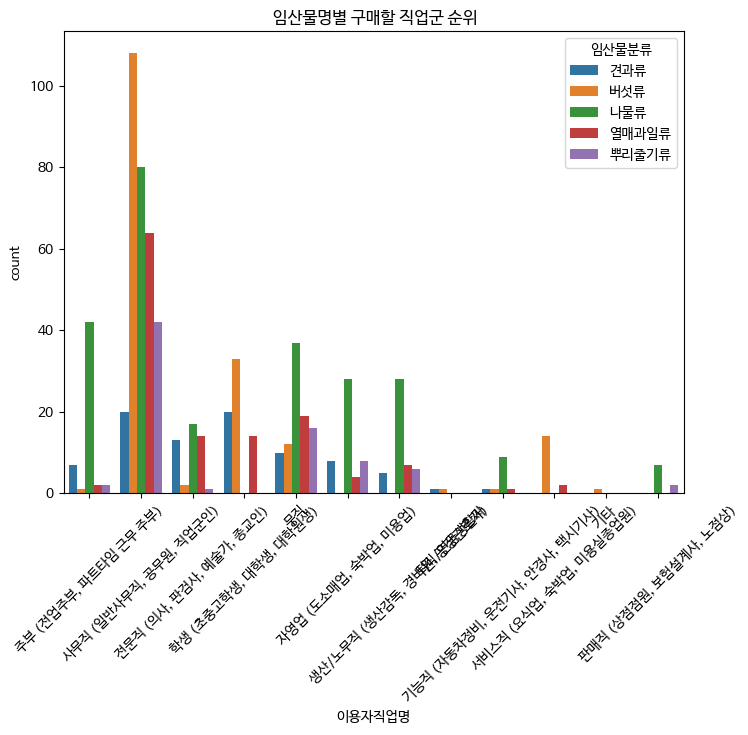

In [ ]:
plt.figure(figsize=(8, 6))
subset = data[(data['예측값']==1)& (data['topic']!='알 수 없음') & (data['이용자직업명']!='false')]
sns.countplot(data=subset, x='이용자직업명', hue='임산물분류')
plt.title(f"임산물명별 구매할 직업군 순위")
plt.xticks(rotation=45)
plt.show()

# insight: 주부에게는 나물 위주로 마케팅, 학생들은 견과류 위주로 마케팅

<Figure size 800x600 with 0 Axes>

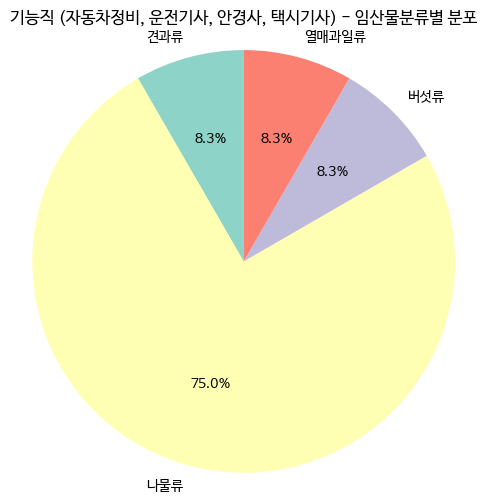

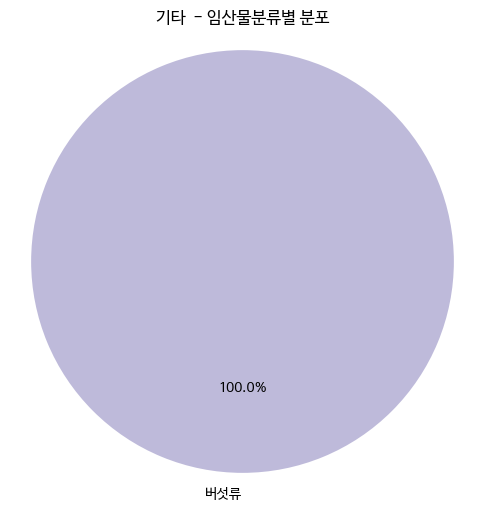

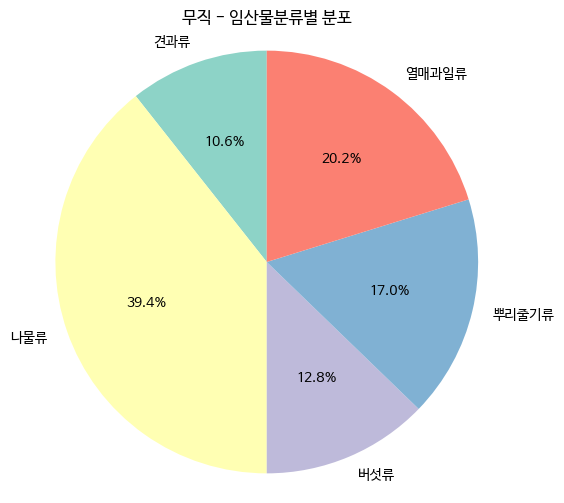

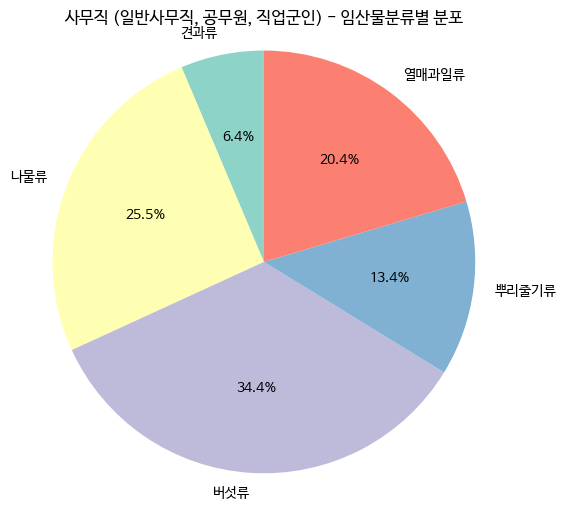

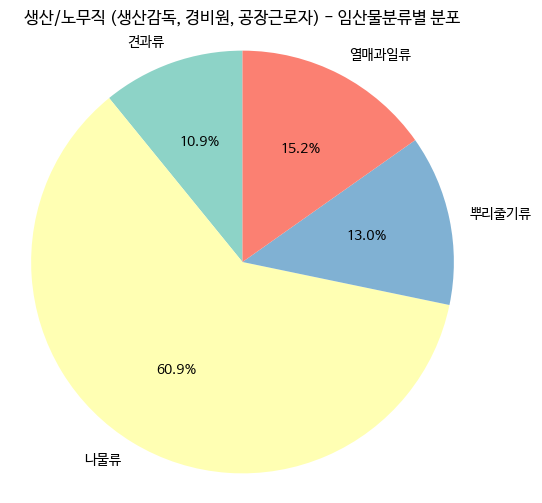

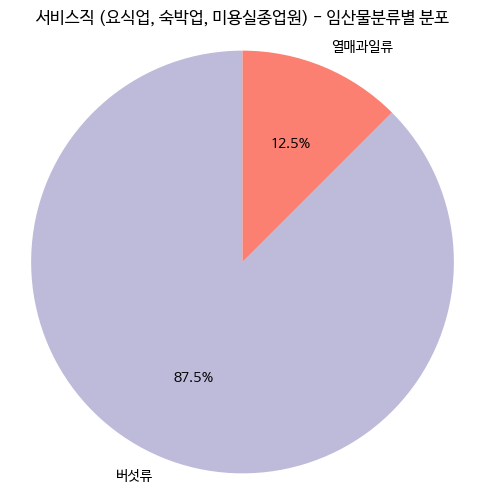

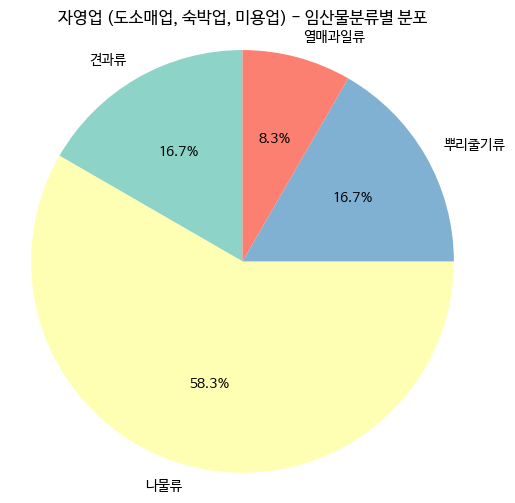

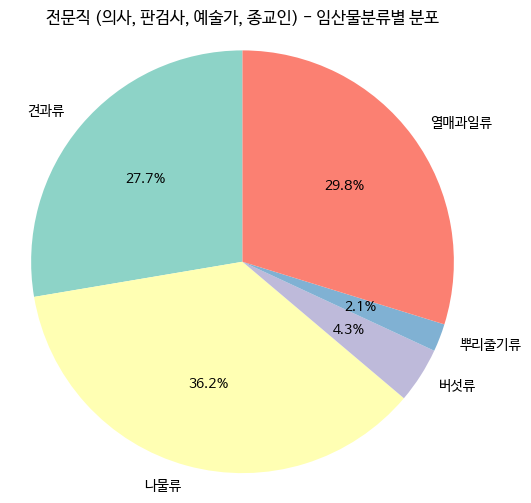

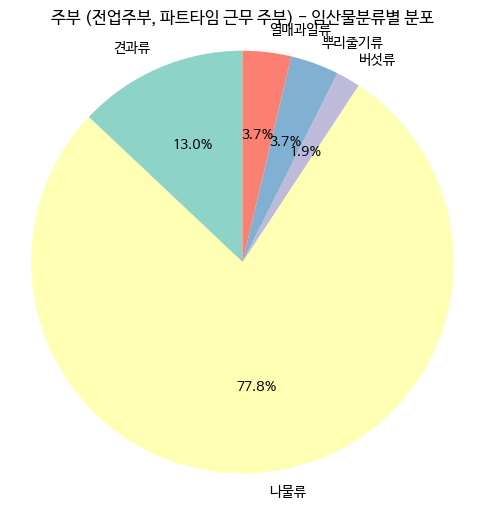

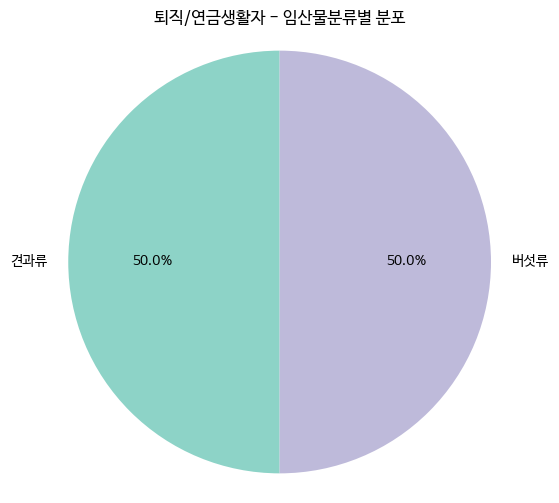

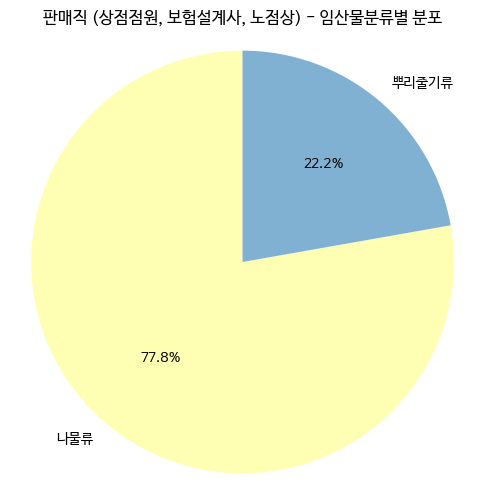

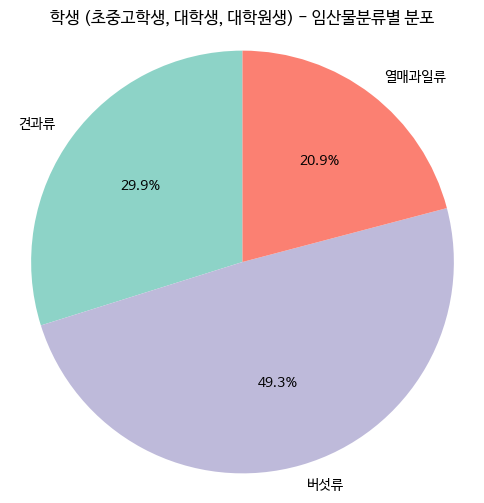

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 조건에 맞는 데이터 필터링
subset = data[(data['예측값'] == 1) & (data['topic'] != '알 수 없음') & (data['이용자직업명'] != 'false')]

# '이용자직업명'과 '임산물분류'별로 데이터를 집계
job_product_counts = subset.groupby(['이용자직업명', '임산물분류']).size().reset_index(name='count')

# 임산물분류별로 색상을 고정하기 위한 색상 정의
product_categories = job_product_counts['임산물분류'].unique()
fixed_colors = sns.color_palette("Set3", len(product_categories))  # Set3 팔레트로 고정된 색상 생성

# 임산물분류별 색상 매핑
category_color_map = {category: fixed_colors[i] for i, category in enumerate(product_categories)}

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 직업군별로 원그래프를 그리기 위해 각 직업군을 순회
for job in job_product_counts['이용자직업명'].unique():
    # 해당 직업군에 대한 데이터 필터링
    job_data = job_product_counts[job_product_counts['이용자직업명'] == job]

    # 각 임산물분류별로 색상 매핑
    job_data['색상'] = job_data['임산물분류'].map(category_color_map)

    # 원그래프 그리기
    plt.figure(figsize=(6, 6))  # 각 직업군에 대해 독립된 그래프 설정
    plt.pie(job_data['count'], labels=job_data['임산물분류'], autopct='%1.1f%%', startangle=90, colors=job_data['색상'])

    # 제목 설정
    plt.title(f"{job} - 임산물분류별 분포")

    # 원을 동그랗게 유지
    plt.axis('equal')

    # 그래프 표시
    plt.show()


<Figure size 1000x600 with 0 Axes>

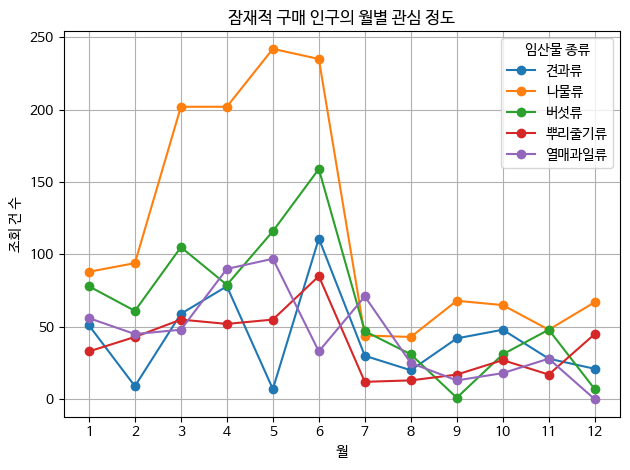

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터가 이미 DataFrame 'df'에 있다고 가정

# 예측값이 1인 데이터만 필터링
subset = data[(data['예측값']==1)& (data['topic']!='알 수 없음')]

# 임산물 분류별, 월별로 그룹화하고 각 그룹의 항목 수(count)를 계산
monthly_counts = subset.groupby(['월', '임산물분류']).size().unstack(fill_value=0)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o')

# 그래프 제목 및 레이블 설정
plt.title('잠재적 구매 인구의 월별 관심 정도')
plt.xlabel('월')
plt.ylabel('조회 건 수')

# 범례를 그래프 안으로 이동 (loc='best'는 자동으로 적절한 위치를 찾음)
plt.legend(title='임산물 종류', loc='best')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])


plt.grid(True)  # 격자 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


<Figure size 1200x600 with 0 Axes>

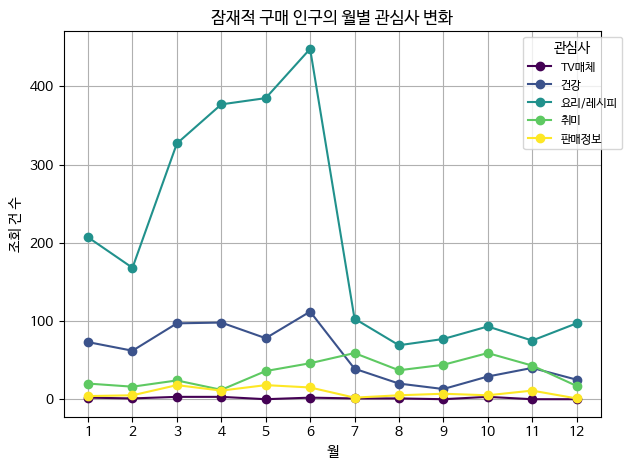

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 예측값이 1인 데이터만 필터링
subset = data[(data['예측값'] == 1) & (data['topic'] != '알 수 없음')]

# topic별, 월별로 그룹화하고 각 그룹의 항목 수(count)를 계산
monthly_topic_counts = subset.groupby(['월', 'topic']).size().unstack(fill_value=0)

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
monthly_topic_counts.plot(kind='line', marker='o', colormap='viridis')

# 그래프 제목 및 레이블 설정
plt.title('잠재적 구매 인구의 월별 관심사 변화')
plt.xlabel('월')
plt.ylabel('조회 건 수')
plt.legend(title='관심사', loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.grid(True)
plt.tight_layout()
plt.show()


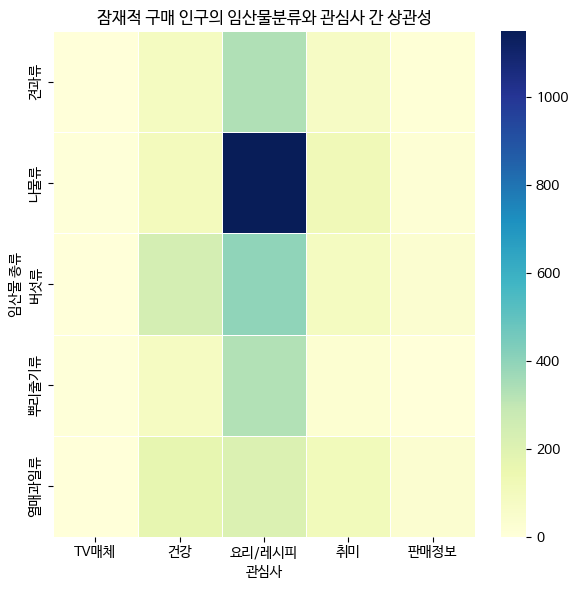

In [ ]:
import seaborn as sns

# 임산물분류별, topic별 빈도 교차 테이블 생성
cross_table = subset.groupby(['임산물분류', 'topic']).size().unstack(fill_value=0)

# Heatmap 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(cross_table, annot=False, cmap='YlGnBu', cbar=True, fmt='d', linewidths=0.5)

# 그래프 제목 및 레이블 설정
plt.title('잠재적 구매 인구의 임산물분류와 관심사 간 상관성')
plt.xlabel('관심사')
plt.ylabel('임산물 종류')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

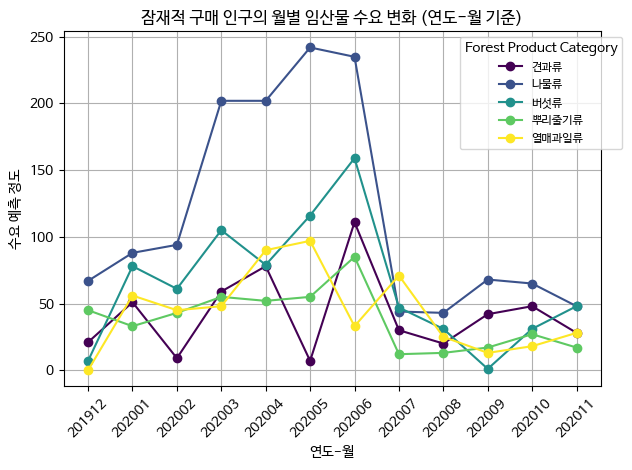

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 연도-월 컬럼 생성
data['연도-월'] = data['정보획득일자'].astype(str).str[:6]

# Step 2: 예측값이 1인 데이터만 필터링
subset = data[(data['예측값'] == 1) & (data['topic'] != '알 수 없음')]

# Step 3: 연도-월 및 임산물분류별 그룹화
monthly_counts = subset.groupby(['연도-월', '임산물분류']).size().unstack(fill_value=0)

# Step 4: 시각화
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', colormap='viridis')

# 모든 x축 값을 표시
plt.xticks(ticks=range(len(monthly_counts.index)), labels=monthly_counts.index, rotation=45)

# 그래프 제목 및 레이블 설정
plt.title('잠재적 구매 인구의 월별 임산물 수요 변화 (연도-월 기준)')
plt.xlabel('연도-월')
plt.ylabel('수요 예측 정도')
plt.legend(title='Forest Product Category', loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.grid(True)
plt.tight_layout()
plt.show()


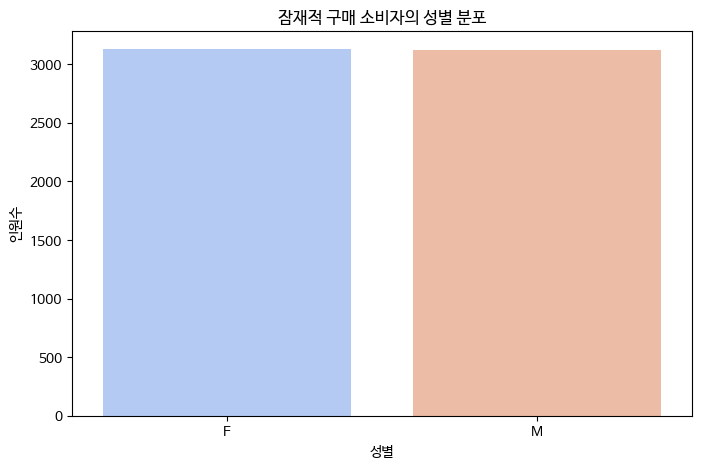

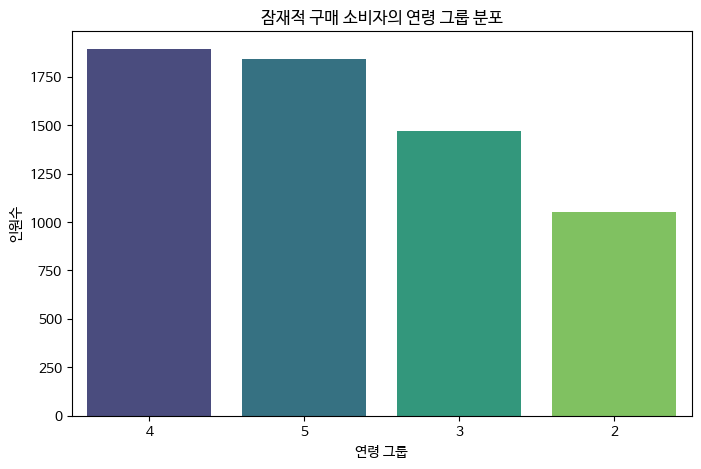

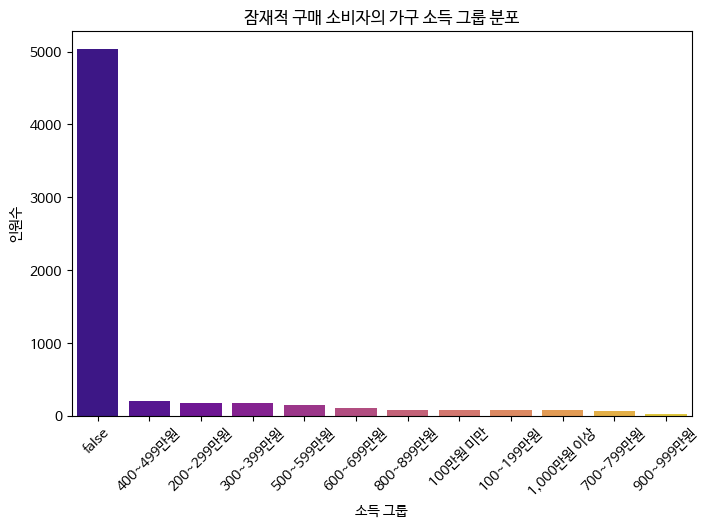

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: 예측값이 1인 데이터만 필터링
subset = data[data['예측값'] == 1]

# Step 2: 소비자 특성별 분포 시각화 (성별)
plt.figure(figsize=(8, 5))
sns.countplot(data=subset, x='이용자성별코드', palette='coolwarm')
plt.title('잠재적 구매 소비자의 성별 분포')
plt.xlabel('성별')
plt.ylabel('인원수')
plt.show()

# Step 3: 연령 그룹 분포
plt.figure(figsize=(8, 5))
sns.countplot(data=subset, x='연령그룹코드', palette='viridis', order=subset['연령그룹코드'].value_counts().index)
plt.title('잠재적 구매 소비자의 연령 그룹 분포')
plt.xlabel('연령 그룹')
plt.ylabel('인원수')
plt.show()

# Step 4: 가구 소득 그룹 분포
plt.figure(figsize=(8, 5))
sns.countplot(data=subset, x='가구소득그룹명', palette='plasma', order=subset['가구소득그룹명'].value_counts().index)
plt.title('잠재적 구매 소비자의 가구 소득 그룹 분포')
plt.xlabel('소득 그룹')
plt.ylabel('인원수')
plt.xticks(rotation=45)
plt.show()


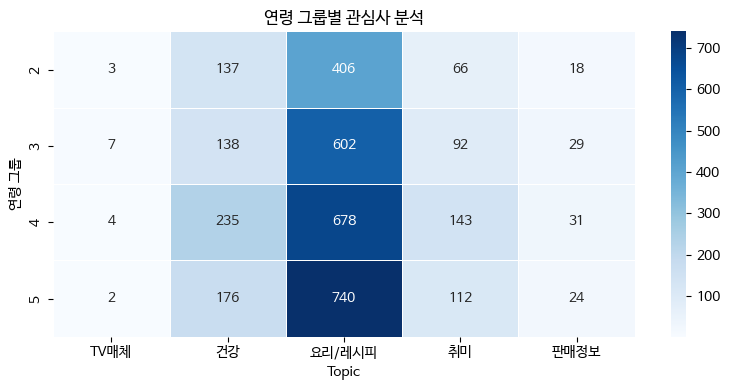

In [ ]:
# Step 1: 예측값이 1인 데이터만 필터링
subset = data[(data['예측값'] == 1) &  (data['topic'] != '알 수 없음')]

# Step 1: 연령 그룹과 topic 간의 교차 테이블 생성
age_topic_table = subset.groupby(['연령그룹코드', 'topic']).size().unstack(fill_value=0)

# Step 2: Heatmap 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(age_topic_table, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

# 그래프 제목 및 레이블 설정
plt.title('연령 그룹별 관심사 분석')
plt.xlabel('Topic')
plt.ylabel('연령 그룹')
plt.tight_layout()
plt.show()


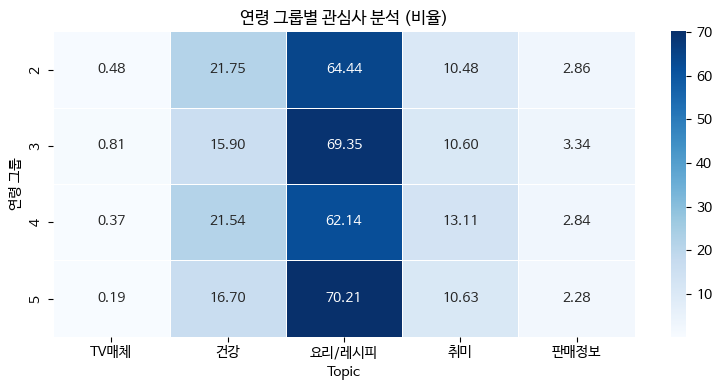

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: 예측값이 1인 데이터만 필터링
subset = data[(data['예측값'] == 1) & (data['topic'] != '알 수 없음')]

# Step 2: 연령 그룹과 topic 간의 교차 테이블 생성
age_topic_table = subset.groupby(['연령그룹코드', 'topic']).size().unstack(fill_value=0)

# Step 3: 각 연령 그룹별 총합 계산
age_totals = age_topic_table.sum(axis=1)

# Step 4: 비율 계산
age_topic_percentage = age_topic_table.div(age_totals, axis=0) * 100

# Step 5: Heatmap 시각화 (비율로)
plt.figure(figsize=(8, 4))
sns.heatmap(age_topic_percentage, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)

# 그래프 제목 및 레이블 설정
plt.title('연령 그룹별 관심사 분석 (비율)')
plt.xlabel('Topic')
plt.ylabel('연령 그룹')
plt.tight_layout()
plt.show()


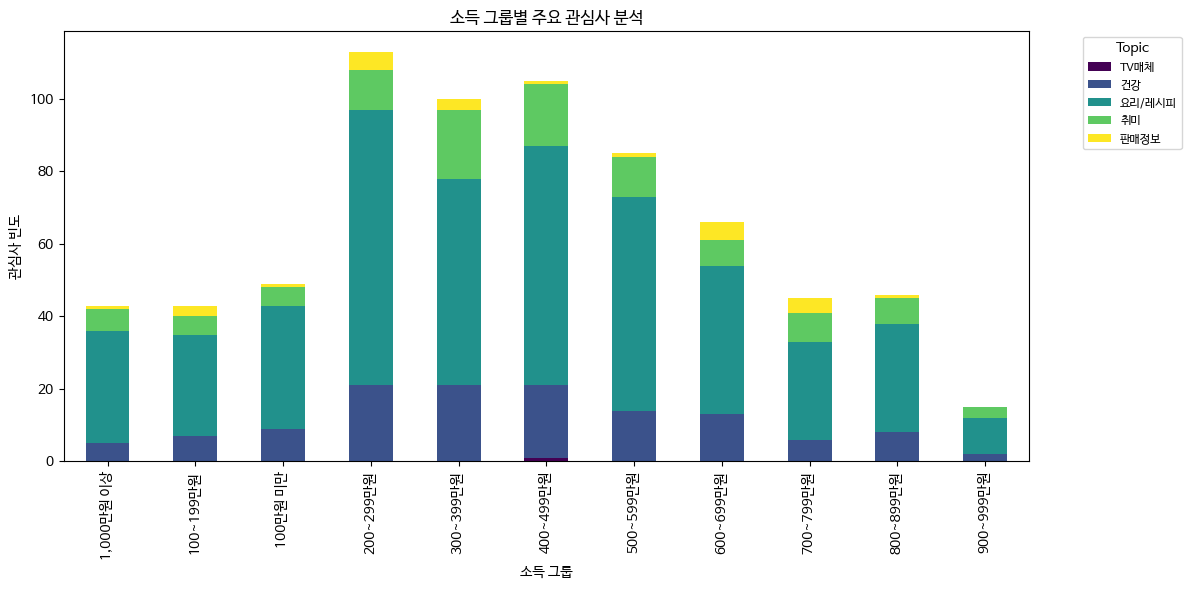

In [ ]:
# Step 1: 예측값이 1인 데이터만 필터링
subset = data[(data['예측값'] == 1) &  (data['topic'] != '알 수 없음') & (data['가구소득그룹명'] != 'false')]

# Step 1: 소득 그룹과 topic 간의 교차 테이블 생성
income_topic_table = subset.groupby(['가구소득그룹명', 'topic']).size().unstack(fill_value=0)

# Step 2: Stacked Bar Plot 시각화
income_topic_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# 그래프 제목 및 레이블 설정
plt.title('소득 그룹별 주요 관심사 분석')
plt.xlabel('소득 그룹')
plt.ylabel('관심사 빈도')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


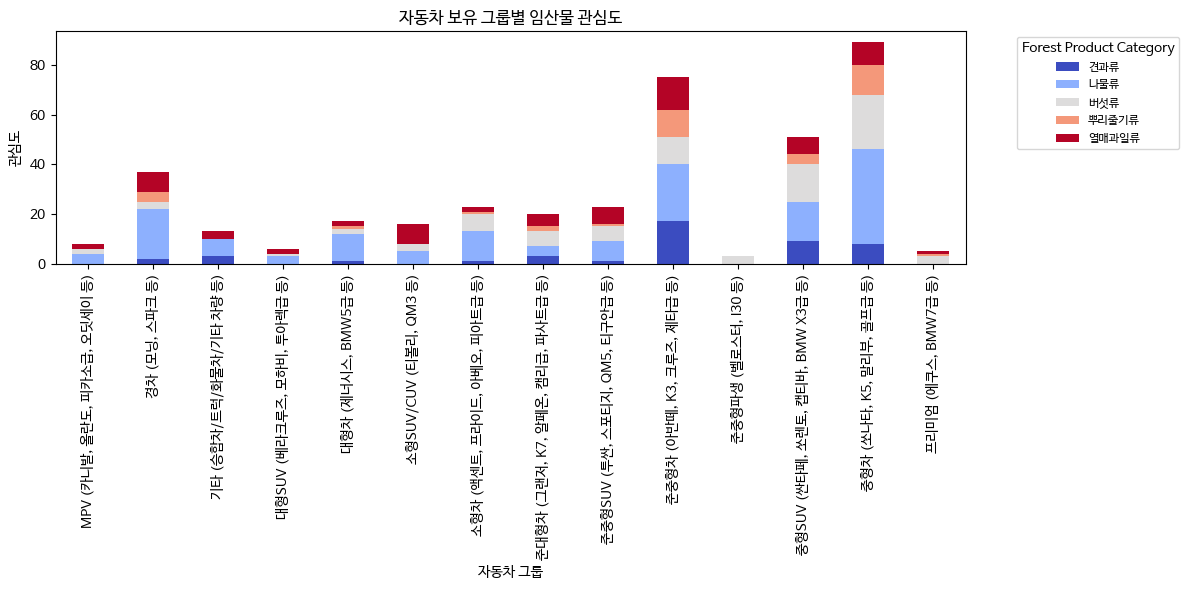

In [ ]:
# Step 1: 예측값이 1인 데이터만 필터링
subset = data[(data['예측값'] == 1) &  (data['topic'] != '알 수 없음') & (data['자동차그룹명'] != 'false')]

# Step 1: 자동차그룹명과 임산물분류 간의 교차 테이블 생성
car_product_table = subset.groupby(['자동차그룹명', '임산물분류']).size().unstack(fill_value=0)

# Step 2: Stacked Bar Plot 시각화
car_product_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# 그래프 제목 및 레이블 설정
plt.title('자동차 보유 그룹별 임산물 관심도')
plt.xlabel('자동차 그룹')
plt.ylabel('관심도')
plt.legend(title='Forest Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

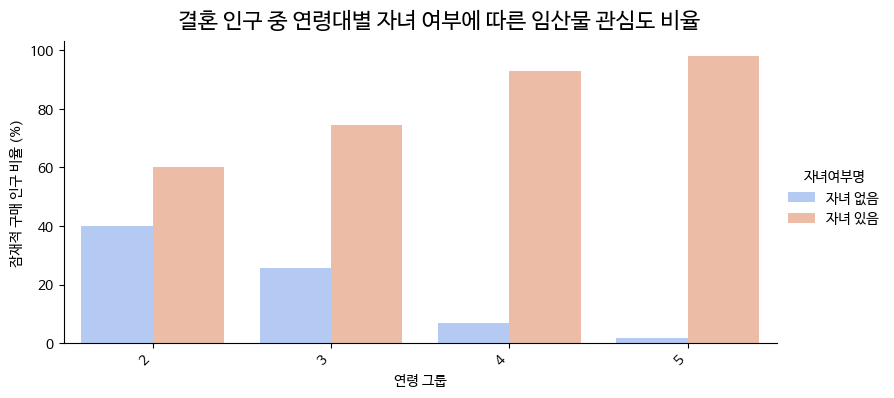

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: 데이터 집계 (연령대별, 결혼 여부, 자녀 여부별로 집계)
grouped_data = subset.groupby(['연령그룹코드', '결혼여부명', '자녀여부명']).size().reset_index(name='count')

# Step 2: 연령대별 총합 계산 (각 연령대 내의 전체 수)
total_by_age = grouped_data.groupby('연령그룹코드')['count'].transform('sum')

# Step 3: 비율 계산 (각 연령대 내에서 결혼 여부, 자녀 여부에 대한 비율)
grouped_data['percentage'] = (grouped_data['count'] / total_by_age) * 100

# Step 4: 시각화를 위한 데이터 구조 조정
plt.figure(figsize=(14, 10))
g = sns.catplot(
    data=grouped_data,
    x='연령그룹코드',
    y='percentage',
    hue='자녀여부명',  # 자녀 여부를 hue로 사용하여 O, X로 비교
    kind='bar',
    height=4,
    aspect=2,
    palette='coolwarm'
)

# Step 5: 그래프 제목 및 레이블 설정
g.set_axis_labels("연령 그룹", "잠재적 구매 인구 비율 (%)")
g.set_titles(col_template="결혼 여부: {col_name}")  # 결혼 여부는 그래프에 제목으로 표시
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('결혼 인구 중 연령대별 자녀 여부에 따른 임산물 관심도 비율', fontsize=16)
plt.show()
